# Netlist extractor

Any component can extract its netlist with `get_netlist`

While `gf.read.from_yaml` converts a `YAML Dict` into a `Component`

`get_netlist` converts `Component` into a `Dict`

In [1]:
from omegaconf import OmegaConf

import gdsfactory as gf
from gdsfactory.generic_tech import get_generic_pdk

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

2023-02-20 17:51:44.702 | INFO     | gdsfactory.config:<module>:50 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.43.1


2023-02-20 17:51:45.583 | INFO     | gdsfactory.technology.layer_views:__init__:785 - Importing LayerViews from YAML file: /home/runner/work/gdsfactory/gdsfactory/gdsfactory/generic_tech/layer_views.yaml.


2023-02-20 17:51:45.590 | INFO     | gdsfactory.pdk:activate:206 - 'generic' PDK is now active


In [2]:
c = gf.components.ring_single()
c

AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

ring_single: uid e327b036, ports ['o2', 'o1'], references ['coupler_ring_1', 'straight_1', 'straight_2', 'bend_euler_1', 'bend_euler_2', 'straight_3'], 0 polygons


<networkx.classes.graph.Graph object at 0x7fe30a0daeb0>

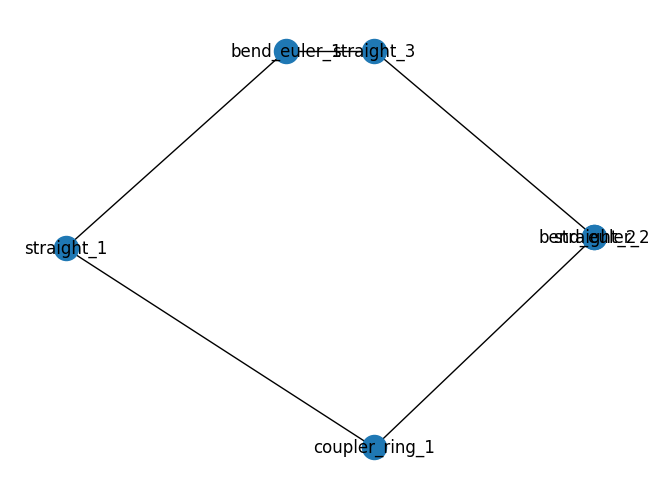

In [3]:
c.plot_netlist()

In [4]:
n = c.get_netlist()

In [5]:
c.write_netlist("ring.yml")

In [6]:
n = OmegaConf.load("ring.yml")

In [7]:
i = list(n["instances"].keys())
i

['bend_euler_1', 'bend_euler_2', 'coupler_ring_1', 'straight_1', 'straight_2', 'straight_3']

In [8]:
instance_name0 = i[0]

In [9]:
n["instances"][instance_name0]["settings"]

{'radius': 10.0}

## Instance names

By default get netlist names each `instance` with the name of the `reference`

<networkx.classes.graph.Graph object at 0x7fe309045e20>

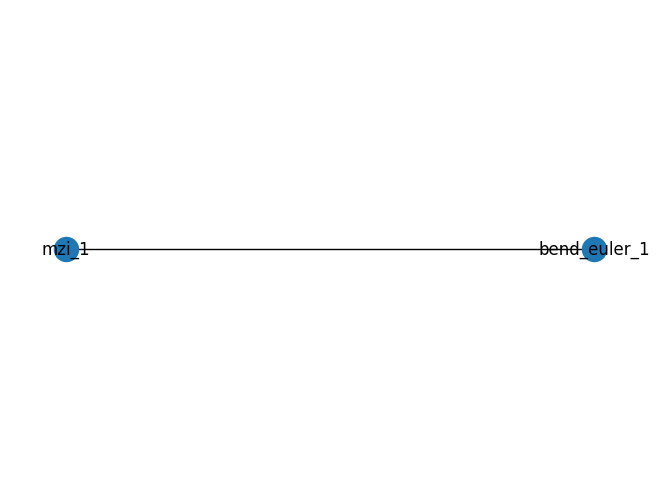

In [10]:
@gf.cell
def mzi_with_bend_automatic_naming():
    c = gf.Component()
    mzi = c.add_ref(gf.components.mzi())
    bend = c.add_ref(gf.components.bend_euler())
    bend.connect("o1", mzi.ports["o2"])
    return c


c = mzi_with_bend_automatic_naming()
c.plot_netlist()

<networkx.classes.graph.Graph object at 0x7fe308cb8040>

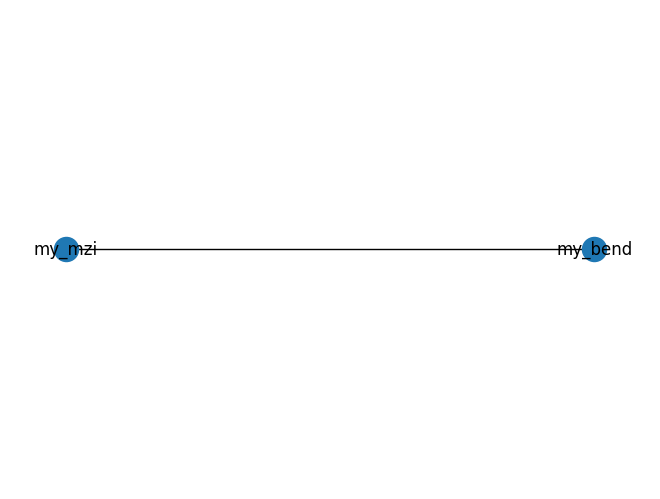

In [11]:
@gf.cell
def mzi_with_bend_deterministic_names_using_alias():
    c = gf.Component()
    mzi = c.add_ref(gf.components.mzi(), alias="my_mzi")
    bend = c.add_ref(gf.components.bend_euler(), alias="my_bend")
    bend.connect("o1", mzi.ports["o2"])
    return c


c = mzi_with_bend_deterministic_names_using_alias()
c.plot_netlist()

In [12]:
c = gf.components.mzi()
c

AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

mzi: uid 33d1f57d, ports ['o1', 'o2'], references ['bend_euler_1', 'bend_euler_2', 'bend_euler_3', 'bend_euler_4', 'bend_euler_5', 'bend_euler_6', 'straight_5', 'straight_6', 'straight_7', 'bend_euler_7', 'bend_euler_8', 'straight_8', 'straight_9', 'straight_10', 'sytl', 'syl', 'sxt', 'sxb', 'cp1', 'cp2'], 0 polygons


In [13]:
c = gf.components.mzi()
n = c.get_netlist()
print(c.get_netlist().keys())

dict_keys(['connections', 'instances', 'placements', 'ports', 'name'])


<networkx.classes.graph.Graph object at 0x7fe3006222e0>

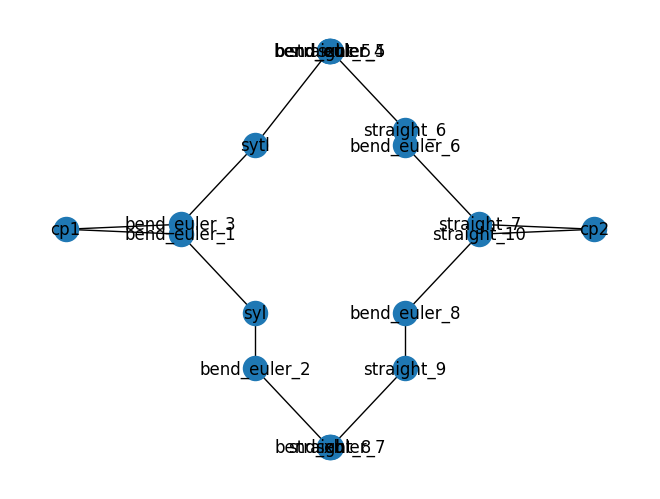

In [14]:
c.plot_netlist()

In [15]:
n.keys()

dict_keys(['connections', 'instances', 'placements', 'ports', 'name'])

## warnings

Lets make a connectivity **error**, for example connecting ports on the wrong layer

In [16]:
@gf.cell
def mmi_with_bend():
    c = gf.Component()
    mmi = c.add_ref(gf.components.mmi1x2(), alias="mmi")
    bend = c.add_ref(gf.components.bend_euler(layer=(2, 0)), alias="bend")
    bend.connect("o1", mmi.ports["o2"])
    return c


c = mmi_with_bend()
c

AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

mmi_with_bend: uid de478931, ports [], references ['mmi', 'bend'], 0 polygons


In [17]:
n = c.get_netlist()

In [18]:
print(n["warnings"])

{'optical': {'unconnected_ports': [{'ports': ['mmi,o1', 'mmi,o3', 'bend,o2'], 'values': [[-10.0, 0.0], [15.5, -0.625], [25.5, 10.625]], 'message': '3 unconnected optical ports!'}]}}


<networkx.classes.graph.Graph object at 0x7fe300307160>

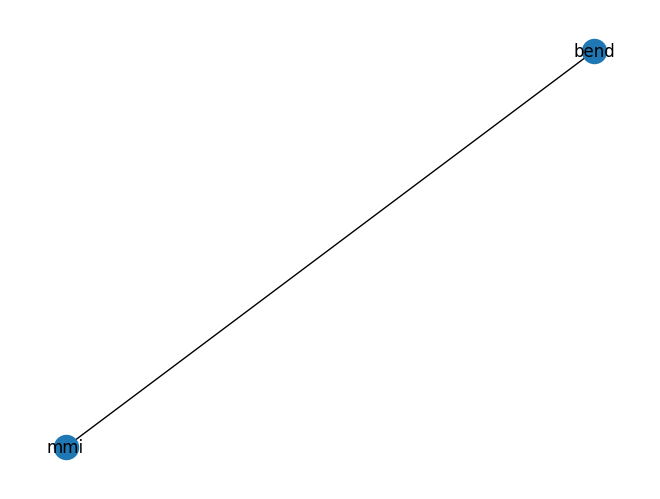

In [19]:
c.plot_netlist()

## get_netlist_recursive

When you do `get_netlist()` for a component it will only show connections for the instances that belong to that component.
So despite having a lot of connections, it will show only the meaningful connections for that component.
For example, a ring has a ring_coupler. If you want to dig deeper, the connections that made that ring coupler are still available.

`get_netlist_recursive()` returns a recursive netlist.

In [20]:
c = gf.components.ring_single()
c

AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

ring_single: uid e327b036, ports ['o2', 'o1'], references ['coupler_ring_1', 'straight_1', 'straight_2', 'bend_euler_1', 'bend_euler_2', 'straight_3'], 0 polygons


<networkx.classes.graph.Graph object at 0x7fe309127340>

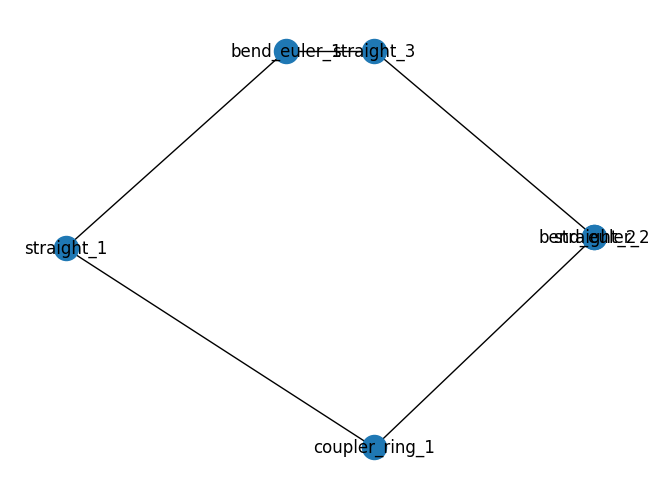

In [21]:
c.plot_netlist()

In [22]:
c = gf.components.ring_double()
c

AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

ring_double: uid 26b042df, ports ['o1', 'o2', 'o3', 'o4'], references ['coupler_ring_1', 'coupler_ring_2', 'straight_1', 'straight_2'], 0 polygons


<networkx.classes.graph.Graph object at 0x7fe2fffb4070>

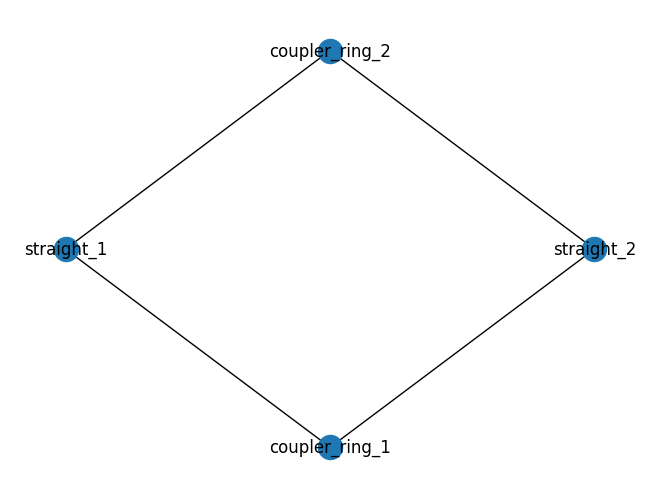

In [23]:
c.plot_netlist()

In [24]:
c = gf.components.mzit()
c

AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

mzit: uid c1c1fb1e, ports ['o4', 'o3', 'o2', 'o1'], references ['coupler_1', 'taper_1', 'bend_euler_1', 'bend_euler_2', 'taper_2', 'straight_1', 'taper_3', 'taper_4', 'straight_2', 'bend_euler_3', 'bend_euler_4', 'straight_3', 'straight_4', 'taper_5', 'straight_5', 'taper_6', 'coupler_2'], 0 polygons


<networkx.classes.graph.Graph object at 0x7fe2f94a8370>

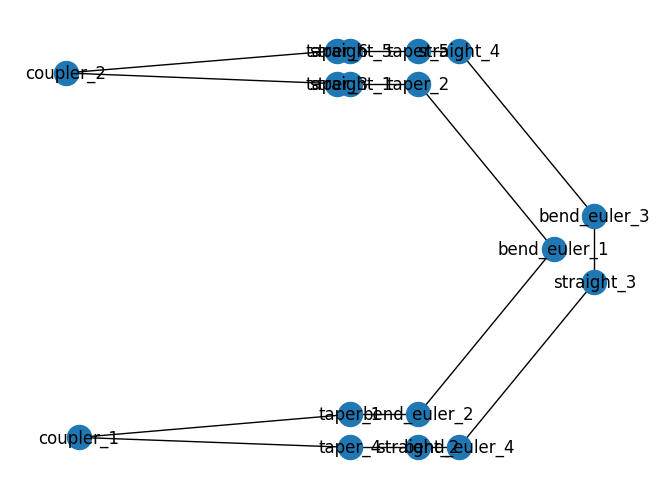

In [25]:
c.plot_netlist()

In [26]:
coupler_lengths = [10, 20, 30]
coupler_gaps = [0.1, 0.2, 0.3]
delta_lengths = [10, 100]

c = gf.components.mzi_lattice(
    coupler_lengths=coupler_lengths,
    coupler_gaps=coupler_gaps,
    delta_lengths=delta_lengths,
)
c

AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

mzi_lattice_3b4b99d8: uid 0fb5513a, ports ['o1', 'o2', 'o3', 'o4'], references ['mzi_1', 'mzi_2'], 0 polygons


<networkx.classes.graph.Graph object at 0x7fe2f9442640>

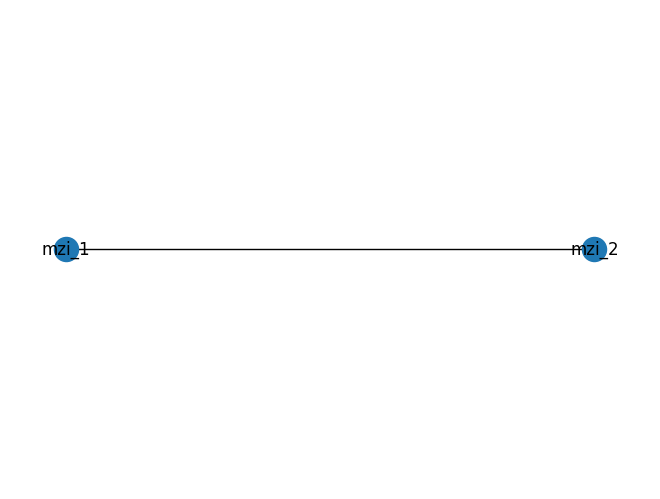

In [27]:
c.plot_netlist()

In [28]:
coupler_lengths = [10, 20, 30, 40]
coupler_gaps = [0.1, 0.2, 0.4, 0.5]
delta_lengths = [10, 100, 200]

c = gf.components.mzi_lattice(
    coupler_lengths=coupler_lengths,
    coupler_gaps=coupler_gaps,
    delta_lengths=delta_lengths,
)
c

AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

mzi_lattice_d52c1fad: uid b6b2fc2c, ports ['o1', 'o2', 'o3', 'o4'], references ['mzi_1', 'mzi_2', 'mzi_3'], 0 polygons


In [29]:
n = c.get_netlist()

<networkx.classes.graph.Graph object at 0x7fe2f8ffb160>

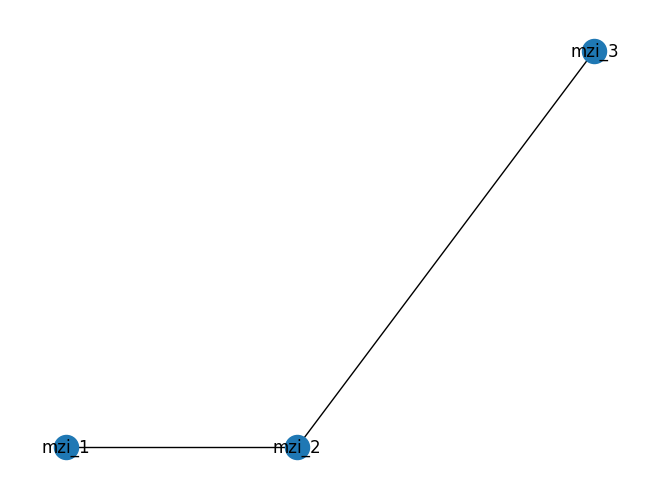

In [30]:
c.plot_netlist()

In [31]:
n_recursive = c.get_netlist_recursive()

In [32]:
n_recursive.keys()

dict_keys(['mzi_lattice_d52c1fad', 'mzi_d26ee7a9', 'mzi_98cc9bb3', 'mzi_ee2873e6'])

## get_netlist_flat

You can also flatten the recursive netlist

In [33]:
flat_netlist = c.get_netlist_flat()

The flat netlist contains the same keys as a regular netlist:

In [34]:
flat_netlist.keys()

dict_keys(['connections', 'placements', 'instances', 'ports', 'name'])

However, its instances are flattened and uniquely renamed according to hierarchy:

In [35]:
flat_netlist["instances"].keys()

dict_keys(['mzi_lattice_d52c1fad~mzi_1~bend_euler_1', 'mzi_lattice_d52c1fad~mzi_1~bend_euler_2', 'mzi_lattice_d52c1fad~mzi_1~bend_euler_3', 'mzi_lattice_d52c1fad~mzi_1~bend_euler_4', 'mzi_lattice_d52c1fad~mzi_1~bend_euler_5', 'mzi_lattice_d52c1fad~mzi_1~bend_euler_6', 'mzi_lattice_d52c1fad~mzi_1~bend_euler_7', 'mzi_lattice_d52c1fad~mzi_1~bend_euler_8', 'mzi_lattice_d52c1fad~mzi_1~cp1', 'mzi_lattice_d52c1fad~mzi_1~cp2', 'mzi_lattice_d52c1fad~mzi_1~straight_10', 'mzi_lattice_d52c1fad~mzi_1~straight_5', 'mzi_lattice_d52c1fad~mzi_1~straight_6', 'mzi_lattice_d52c1fad~mzi_1~straight_7', 'mzi_lattice_d52c1fad~mzi_1~straight_8', 'mzi_lattice_d52c1fad~mzi_1~straight_9', 'mzi_lattice_d52c1fad~mzi_1~sxb', 'mzi_lattice_d52c1fad~mzi_1~sxt', 'mzi_lattice_d52c1fad~mzi_1~syl', 'mzi_lattice_d52c1fad~mzi_1~sytl', 'mzi_lattice_d52c1fad~mzi_2~bend_euler_1', 'mzi_lattice_d52c1fad~mzi_2~bend_euler_2', 'mzi_lattice_d52c1fad~mzi_2~bend_euler_3', 'mzi_lattice_d52c1fad~mzi_2~bend_euler_4', 'mzi_lattice_d52c1fad~mzi_2~bend_euler_5', 'mzi_lattice_d52c1fad~mzi_2~bend_euler_6', 'mzi_lattice_d52c1fad~mzi_2~bend_euler_7', 'mzi_lattice_d52c1fad~mzi_2~bend_euler_8', 'mzi_lattice_d52c1fad~mzi_2~cp2', 'mzi_lattice_d52c1fad~mzi_2~straight_10', 'mzi_lattice_d52c1fad~mzi_2~straight_5', 'mzi_lattice_d52c1fad~mzi_2~straight_6', 'mzi_lattice_d52c1fad~mzi_2~straight_7', 'mzi_lattice_d52c1fad~mzi_2~straight_8', 'mzi_lattice_d52c1fad~mzi_2~straight_9', 'mzi_lattice_d52c1fad~mzi_2~sxb', 'mzi_lattice_d52c1fad~mzi_2~sxt', 'mzi_lattice_d52c1fad~mzi_2~syl', 'mzi_lattice_d52c1fad~mzi_2~sytl', 'mzi_lattice_d52c1fad~mzi_3~bend_euler_1', 'mzi_lattice_d52c1fad~mzi_3~bend_euler_2', 'mzi_lattice_d52c1fad~mzi_3~bend_euler_3', 'mzi_lattice_d52c1fad~mzi_3~bend_euler_4', 'mzi_lattice_d52c1fad~mzi_3~bend_euler_5', 'mzi_lattice_d52c1fad~mzi_3~bend_euler_6', 'mzi_lattice_d52c1fad~mzi_3~bend_euler_7', 'mzi_lattice_d52c1fad~mzi_3~bend_euler_8', 'mzi_lattice_d52c1fad~mzi_3~cp2', 'mzi_lattice_d52c1fad~mzi_3~straight_10', 'mzi_lattice_d52c1fad~mzi_3~straight_5', 'mzi_lattice_d52c1fad~mzi_3~straight_6', 'mzi_lattice_d52c1fad~mzi_3~straight_7', 'mzi_lattice_d52c1fad~mzi_3~straight_8', 'mzi_lattice_d52c1fad~mzi_3~straight_9', 'mzi_lattice_d52c1fad~mzi_3~sxb', 'mzi_lattice_d52c1fad~mzi_3~sxt', 'mzi_lattice_d52c1fad~mzi_3~syl', 'mzi_lattice_d52c1fad~mzi_3~sytl'])

Placement information is accumulated, and connections and ports are mapped, respectively, to the ports of the unique instances or the component top level ports. This can be plotted:

<networkx.classes.graph.Graph object at 0x7fe2f903edf0>

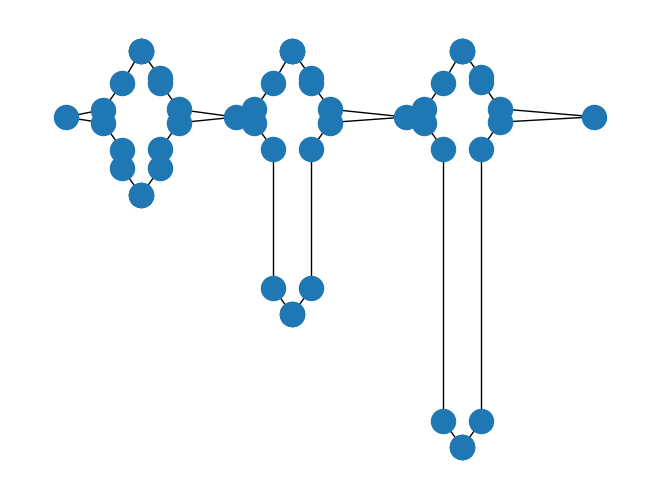

In [36]:
c.plot_netlist_flat(with_labels=False)  # labels get cluttered

## allow_multiple_connections

The default `get_netlist` function (also used by default by `get_netlist_recurse` and `get_netlist_flat`) can identify more than two ports sharing the same connection through the `allow_multiple` flag.

For instance, consider a resistor network with one shared node:

In [37]:
vdiv = gf.Component("voltageDivider")
r1 = vdiv << gf.components.resistance_sheet()
r2 = vdiv << gf.components.resistance_sheet()
r3 = vdiv << gf.get_component(gf.components.resistance_sheet).rotate()
r4 = vdiv << gf.get_component(gf.components.resistance_sheet).rotate()

r1.connect("pad2", r2.ports["pad1"])
r3.connect("pad1", r2.ports["pad1"], preserve_orientation=True)
r4.connect("pad2", r2.ports["pad1"], preserve_orientation=True)

vdiv

AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

voltageDivider: uid d6027f8a, ports [], references ['resistance_sheet_1', 'resistance_sheet_2', 'rotate_1', 'rotate_2'], 0 polygons


In [38]:
try:
    vdiv.get_netlist_flat()
except Exception as exc:
    print(exc)

Found multiple connections at (-50.0, 0.0):['resistance_sheet_1,pad2', 'resistance_sheet_2,pad1', 'rotate_1,pad1', 'rotate_2,pad2']


In [39]:
vdiv.get_netlist_flat(allow_multiple=True)

{
    'connections': {
        'voltageDivider~resistance_sheet_1,pad2': ['voltageDivider~resistance_sheet_2,pad1'],
        'voltageDivider~resistance_sheet_2,pad1': [
            'voltageDivider~resistance_sheet_1,pad2',
            'voltageDivider~rotate_1~resistance_sheet_1,pad1'
        ],
        'voltageDivider~rotate_1~resistance_sheet_1,pad1': [
            'voltageDivider~resistance_sheet_2,pad1',
            'voltageDivider~rotate_2~resistance_sheet_1,pad2'
        ],
        'voltageDivider~rotate_2~resistance_sheet_1,pad2': [
            'voltageDivider~rotate_1~resistance_sheet_1,pad1'
        ]
    },
    'placements': {
        'voltageDivider~resistance_sheet_1': {'x': -100.0, 'y': 0.0, 'mirror': 0, 'rotation': 0},
        'voltageDivider~resistance_sheet_2': {'x': 0.0, 'y': 0.0, 'mirror': 0, 'rotation': 0},
        'voltageDivider~rotate_1~resistance_sheet_1': {
            'x': -50.0,
            'y': 50.0,
            'mirror': 0,
            'rotation': 90
        },
        'voltageDivider~rotate_2~resistance_sheet_1': {
            'x': -50.0,
            'y': -50.0,
            'mirror': 0,
            'rotation': 90
        }
    },
    'instances': {
        'voltageDivider~resistance_sheet_1': {
            'component': 'resistance_sheet',
            'info': {'resistance': None},
            'settings': {}
        },
        'voltageDivider~resistance_sheet_2': {
            'component': 'resistance_sheet',
            'info': {'resistance': None},
            'settings': {}
        },
        'voltageDivider~rotate_1~resistance_sheet_1': {
            'component': 'resistance_sheet',
            'info': {'resistance': None},
            'settings': {}
        },
        'voltageDivider~rotate_2~resistance_sheet_1': {
            'component': 'resistance_sheet',
            'info': {'resistance': None},
            'settings': {}
        }
    },
    'ports': {},
    'name': 'voltageDivider'
}